In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Project: Monthly Armed Robberies in Boston**

The steps of this project that we will work through are as follows:
1. Problem Description.
2. Test Harness.
3. Persistence.
4. Data Analysis.
5. ARIMA Models
6. Model Validation.

This will provide a template for working through a time series prediction problem that you can use on your own dataset.

**Problem Description**

The problem is to predict the number of monthly armed robberies in Boston, USA.

**Test Harness**

We must develop a test harness to investigate the data and evaluate candidate models. This involves two steps:
1. Defining a Validation Dataset.
2. Developing a Method for Model Evaluation.

*Validation Dataset*

View the code below

In [2]:
# Split into a training and validation dataset
series = pd.read_csv('monthly-robberies.csv',header=0,index_col=0,parse_dates=True,squeeze=True)
split_point =len(series) -12
dataset, validation = series[0:split_point], series[split_point:]
print(f"Dataset: {len(dataset)}\nValidation: {len(validation)}")
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv", header=False)

Dataset: 106
Validation: 12


In [3]:
dataset # dataset.csv: Observations from January 1966 to October 1974 (106 observations)

Month
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
             ... 
1974-06-01    287
1974-07-01    355
1974-08-01    460
1974-09-01    364
1974-10-01    487
Name: Robberies, Length: 106, dtype: int64

In [4]:
validation # validation.csv: Observations from November 1974 to October 1975 (12 observations)

Month
1974-11-01    452
1974-12-01    391
1975-01-01    500
1975-02-01    451
1975-03-01    375
1975-04-01    372
1975-05-01    302
1975-06-01    316
1975-07-01    398
1975-08-01    394
1975-09-01    431
1975-10-01    431
Name: Robberies, dtype: int64

*Model Evaluation*

Model evaluation will only be performed on the data in dataset.csv prepared in the previous section. Model evaluation involves two elements:
1. Performance Measure.
2. Test Strategy.

*Performance Measure*

The observations are a count of robberies. We will evaluate the performance of predictions using the root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data. Any transforms to the data must be reversed before the RMSE is calculated and reported to make the performance between different methods directly comparable.

*Test Strategy*

The walk-forward validation will work as follows:
1. The first 50% of the dataset will be held back to train the model.
2. The remaining 50% of the dataset will be iterated and test the model.
3. For each step in the test dataset:

(a) A model will be trained.

(b) A one-step prediction made and the prediction stored for later evaluation.

(c) The actual observation from the test dataset will be added to the training dataset for the next iteration.

4. The predictions made during the iteration of the test dataset will be evaluated and an RMSE score reported.

Kindly make use of the code in persistence section 

**Persistence**

The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance. This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared. The baseline prediction for time series forecasting is called the naive forecast, or persistence. This is where the observation from the previous time step is used as the prediction for the observation at the next time step.

In [5]:
# evaluate a persistence model
from sklearn.metrics import mean_squared_error

# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions, squared=False)
print(f"RMSE: {rmse}")

Predicted: 98.0, Expected: 125.0
Predicted: 125.0, Expected: 155.0
Predicted: 155.0, Expected: 190.0
Predicted: 190.0, Expected: 236.0
Predicted: 236.0, Expected: 189.0
Predicted: 189.0, Expected: 174.0
Predicted: 174.0, Expected: 178.0
Predicted: 178.0, Expected: 136.0
Predicted: 136.0, Expected: 161.0
Predicted: 161.0, Expected: 171.0
Predicted: 171.0, Expected: 149.0
Predicted: 149.0, Expected: 184.0
Predicted: 184.0, Expected: 155.0
Predicted: 155.0, Expected: 276.0
Predicted: 276.0, Expected: 224.0
Predicted: 224.0, Expected: 213.0
Predicted: 213.0, Expected: 279.0
Predicted: 279.0, Expected: 268.0
Predicted: 268.0, Expected: 287.0
Predicted: 287.0, Expected: 238.0
Predicted: 238.0, Expected: 213.0
Predicted: 213.0, Expected: 257.0
Predicted: 257.0, Expected: 293.0
Predicted: 293.0, Expected: 212.0
Predicted: 212.0, Expected: 246.0
Predicted: 246.0, Expected: 353.0
Predicted: 353.0, Expected: 339.0
Predicted: 339.0, Expected: 308.0
Predicted: 308.0, Expected: 247.0
Predicted: 247.

**Data Analysis**

In this section, we will look at the data from four perspectives:
1. Summary Statistics.
2. Line Plot.
3. Density Plots.
4. Box and Whisker Plot.

*Summary Statistics*

In [6]:
# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
# summary statistics
series.describe()

count    106.000000
mean     173.103774
std      112.231133
min       29.000000
25%       74.750000
50%      144.500000
75%      271.750000
max      487.000000
Name: 1, dtype: float64

Some observations from these statistics include:
- The number of observations (count) matches our expectation, meaning we are handling the data correctly.
- The mean is about 173, which we might consider our level in this series.
- The standard deviation (average spread from the mean) is relatively large at 112 robberies.
- The percentiles along with the standard deviation do suggest a large spread to the data.

The large spread in this series will likely make highly accurate predictions difficult if it is caused by random  uctuation (e.g. not systematic).

Text(0, 0.5, 'values')

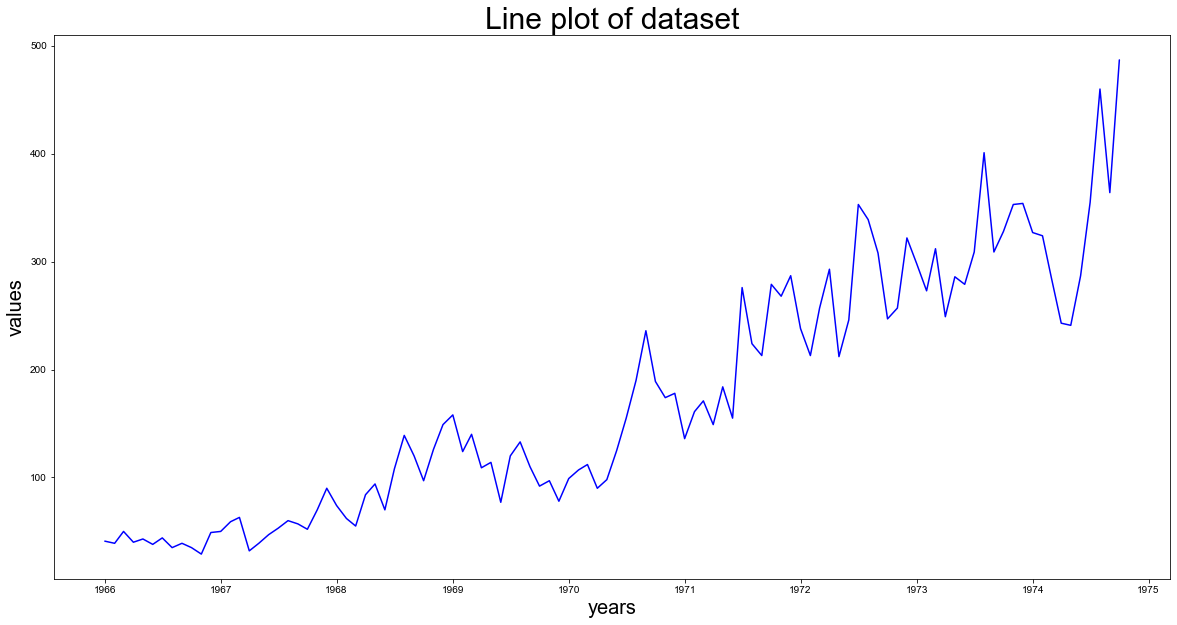

In [7]:
# line plot
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')
sns.lineplot(data=series,ax=ax,color='blue')
ax.set_title(f"Line plot of dataset", fontdict={'fontsize':30})
ax.set_xlabel('years', fontdict={'fontsize':20})
ax.set_ylabel('values', fontdict={'fontsize':20})

Some observations from the plot include:
- There is an increasing trend of robberies over time.
- There do not appear to be any obvious outliers.
- There are relatively large fluctuations from year to year, up and down.
- The fluctuations at later years appear larger than fluctuations at earlier years.
- The trend means the dataset is almost certainly non-stationary and the apparent change in  fluctuation may also contribute.

These simple observations suggest we may see benefit in modeling the trend and removing it from the time series. Alternately, we could use differencing to make the series stationary for modeling. We may even need two levels of differencing if there is a growth trend in the fluctuations in later years.

Text(0.5, 0, '')

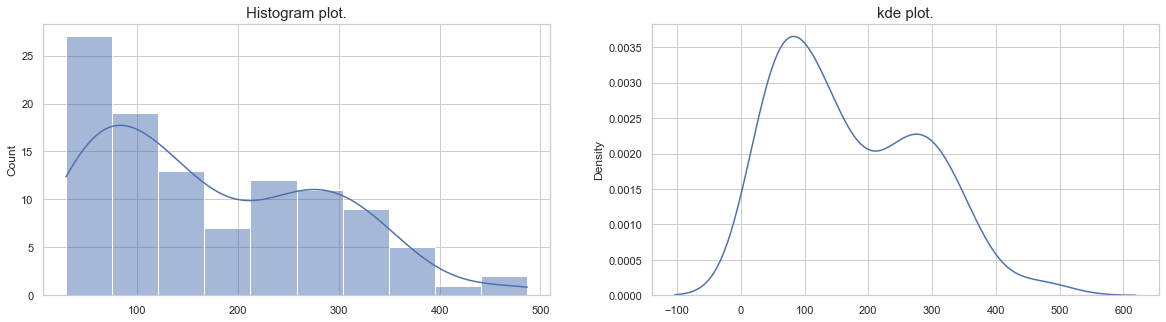

In [8]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=series,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=series, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

In [9]:
# box plot
# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
groups = series['1966':'1973'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name,group in groups:
    years[name.year] = group.values
years

,1966,1967,1968,1969,1970,1971,1972,1973
0,41,50,74,158,99,136,238,298
1,39,59,62,124,107,161,213,273
2,50,63,55,140,112,171,257,312
3,40,32,84,109,90,149,293,249
4,43,39,94,114,98,184,212,286
5,38,47,70,77,125,155,246,279
6,44,53,108,120,155,276,353,309
7,35,60,139,133,190,224,339,401
8,39,57,120,110,236,213,308,309
9,35,52,97,92,189,279,247,328


Text(0.5, 1.0, 'Boxen plot.')

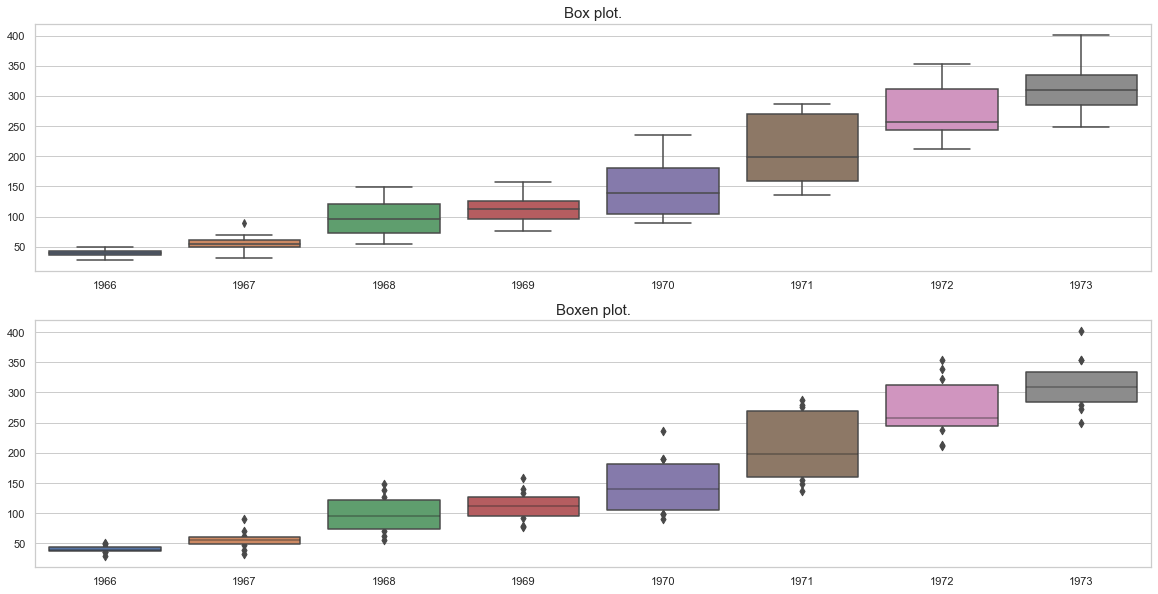

In [10]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.set_theme(style='whitegrid')

sns.boxplot(data=years,ax=ax[0])
ax[0].set_title("Box plot.", fontdict={'fontsize':15})

sns.boxenplot(data=years, ax=ax[1])
ax[1].set_title("Boxen plot.", fontdict={'fontsize':15})

Some observations from reviewing the plot include:
- The median values for each year (red line) show a trend that may not be linear.
- The spread, or middle 50% of the data (blue boxes), differ, but perhaps not consistently over time.
- The earlier years, perhaps first 2, are quite different from the rest of the dataset.

The observations suggest that the year-to-year fluctuations may not be systematic and hard to model. They also suggest that there may be some benefit in clipping the first two years of data from modeling if it is indeed quite different. This yearly view of the data is an interesting avenue and could be pursued further by looking at summary statistics from year-to-year and changes in summary stats from year-to-year.

**ARIMA Models**

We will approach this in four steps:
1. Developing a manually configured ARIMA model.
2. Using a grid search of ARIMA to find an optimized model.
3. Analysis of forecast residual errors to evaluate any bias in the model.
4. Explore improvements to the model using power transforms.

*Manually Configured ARIMA*

Nonseasonal ARIMA(p,d,q) requires three parameters and is traditionally configured manually. Analysis of the time series data assumes that we are working with a stationary time series. The time series is almost certainly non-stationary. We can make it stationary by first differencing the series and using a statistical test to confirm that the result is stationary.

In [11]:
# statistical test for te stationarity of the time series
from statsmodels.tsa.stattools import adfuller

# create a differenced time series 
def difference(dataset):
    diff = []
    for i in range(1,len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return pd.Series(diff)


series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
# difference data
stationary = difference(X)
# print(stationary)
stationary.index = series.index[1:]
# print(stationary)

# check if stationary
result = adfuller(stationary)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Crtitical Values: ")
for key,value in result[4].items():
    print(f"{key}: {np.round(value,4)}")

# save
stationary.to_csv('stationary.csv', header=False)

ADF Statistic: -3.9809463038611255
p-value: 0.0015136348242121929
Crtitical Values: 
1%: -3.5027
5%: -2.8932
10%: -2.5836


Running the example outputs the result of a statistical significance test of whether the 1-lag differenced series is stationary. Specifically, the augmented Dickey-Fuller test. The results show that the test statistic value -3.980946 is smaller than the critical value at 5% of -2.893. This suggests that we can reject the null hypothesis with a significance level of less than 5% (i.e. a low probability that the result is a statistical  uke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the 1-lag differenced time series is stationary or does not have time-dependent structure.

<AxesSubplot:xlabel='0'>

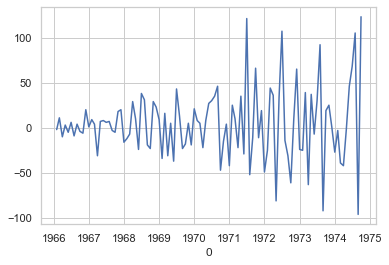

In [12]:
sns.lineplot(data=stationary)

This suggests that at least one level of differencing is required. The d parameter in our ARIMA model should at least be a value of 1. The next step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

<AxesSubplot:xlabel='0', ylabel='1'>

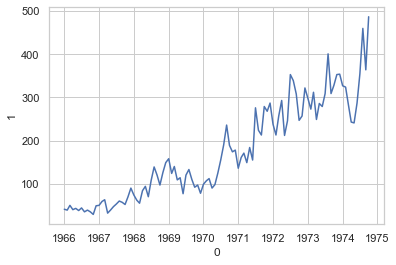

In [13]:
sns.lineplot(data=series)

Text(0.5, 1.0, 'Partial Autocorrelation plot')

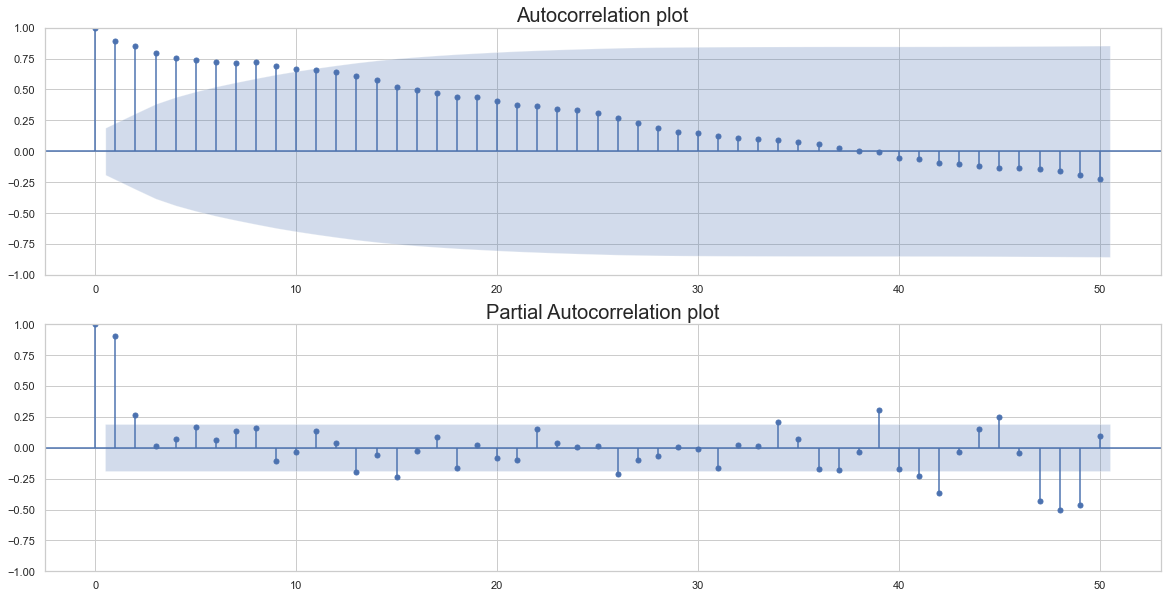

In [14]:
# ACF and PACF plots of time series
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(series,lags=50,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(series,lags=50,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

Below are some observations from the plots.
- The ACF shows a significant lag for 10-11 months.
- The PACF shows a significant lag for perhaps 2 months.
- Both the ACF and PACF show a drop-off at the same point, perhaps suggesting a mix of AR and MA. 

A good starting point for the p and q values are 11 and 2.

In [15]:
# Establishing a baseline using ARIMA(0,1,2)
from statsmodels.tsa.arima.model import ARIMA

series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X)* 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

Predicted: 99.92251101270742, Expected: 125.0
Predicted: 116.441943367295, Expected: 155.0
Predicted: 139.9622864583748, Expected: 190.0
Predicted: 176.93297222571795, Expected: 236.0
Predicted: 232.85149336981783, Expected: 189.0
Predicted: 184.69696983949618, Expected: 174.0
Predicted: 180.70522763554268, Expected: 178.0
Predicted: 179.87256815546817, Expected: 136.0
Predicted: 141.09782685947903, Expected: 161.0
Predicted: 166.17265068555508, Expected: 171.0
Predicted: 167.0051388142078, Expected: 149.0
Predicted: 150.65649676223, Expected: 184.0
Predicted: 182.31438342649955, Expected: 155.0
Predicted: 154.21307389387493, Expected: 276.0
Predicted: 245.21422762412433, Expected: 224.0
Predicted: 225.9022732622049, Expected: 213.0
Predicted: 216.86746295787268, Expected: 279.0
Predicted: 258.69791486852523, Expected: 268.0
Predicted: 263.37719179004654, Expected: 287.0
Predicted: 279.94465627227265, Expected: 238.0
Predicted: 251.48470748006102, Expected: 213.0
Predicted: 226.5739171

This is a good start, but we may be able to get improved results with a better configured ARIMA model.

*Grid Search ARIMA Hyperparameters*

We will search values of p, d, and q for combinations that do not result in error, and find the combination that results in the best performance.

In [16]:
# evaluate ARIMA model for given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(arima_order))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = mean_squared_error(test,predictions,squared=False)
    return rmse


# evaluate combinations of p,q,d values for a ARIMA model
def evaluate_models(dataset,p_values,d_values, q_values):
    dataset =dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset,order)
                    if rmse< best_score:
                        best_score, best_cfg = rmse,order
                    print(f"ARIMA: {order}, RMSE: {rmse}")
                except:
                    continue
    print(f"Best ARIMA: {best_cfg}, RMSE: {best_score}")

# load dataset
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0,13)
d_values = range(0,4)
q_values = range(0,13)
warnings.filterwarnings("ignore")

In [17]:
# evaluate_models(series.values,p_values,d_values, q_values) # This takes so loooooonnnnnnnggg
# make use of the configuration mentioned in the book --> (0,1,2)

*Review Residual Errors*

A good final check of a model is to review residual forecast errors. Ideally, the distribution of residual errors should be a Gaussian with a zero mean. We can check this by plotting the residuals with a histogram and density plots.

In [18]:
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X)* 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
# residuals
residuals.describe()

Predicted: 99.92251101270742, Expected: 125.0
Predicted: 116.441943367295, Expected: 155.0
Predicted: 139.9622864583748, Expected: 190.0
Predicted: 176.93297222571795, Expected: 236.0
Predicted: 232.85149336981783, Expected: 189.0
Predicted: 184.69696983949618, Expected: 174.0
Predicted: 180.70522763554268, Expected: 178.0
Predicted: 179.87256815546817, Expected: 136.0
Predicted: 141.09782685947903, Expected: 161.0
Predicted: 166.17265068555508, Expected: 171.0
Predicted: 167.0051388142078, Expected: 149.0
Predicted: 150.65649676223, Expected: 184.0
Predicted: 182.31438342649955, Expected: 155.0
Predicted: 154.21307389387493, Expected: 276.0
Predicted: 245.21422762412433, Expected: 224.0
Predicted: 225.9022732622049, Expected: 213.0
Predicted: 216.86746295787268, Expected: 279.0
Predicted: 258.69791486852523, Expected: 268.0
Predicted: 263.37719179004654, Expected: 287.0
Predicted: 279.94465627227265, Expected: 238.0
Predicted: 251.48470748006102, Expected: 213.0
Predicted: 226.5739171

,0
count,53.000000
mean,11.097733
std,50.373707
min,-65.210806
25%,-21.214228
50%,9.302085
75%,31.823150
max,151.716639


Text(0.5, 0, '')

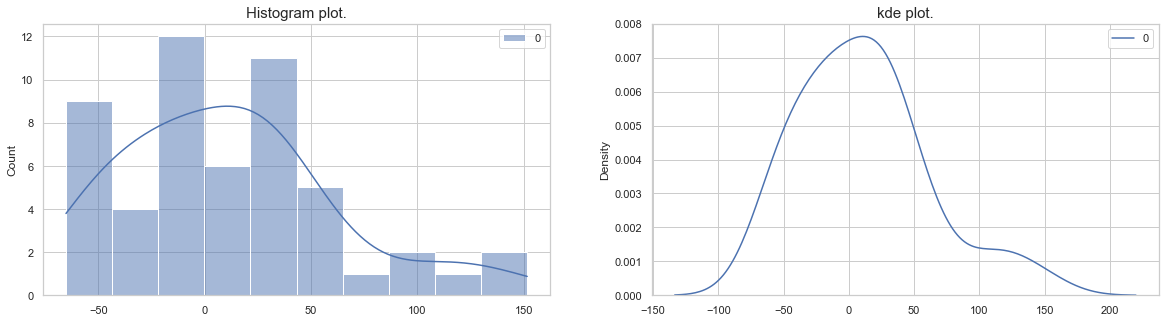

In [19]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=residuals,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=residuals, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

Text(0.5, 1.0, 'Partial Autocorrelation plot')

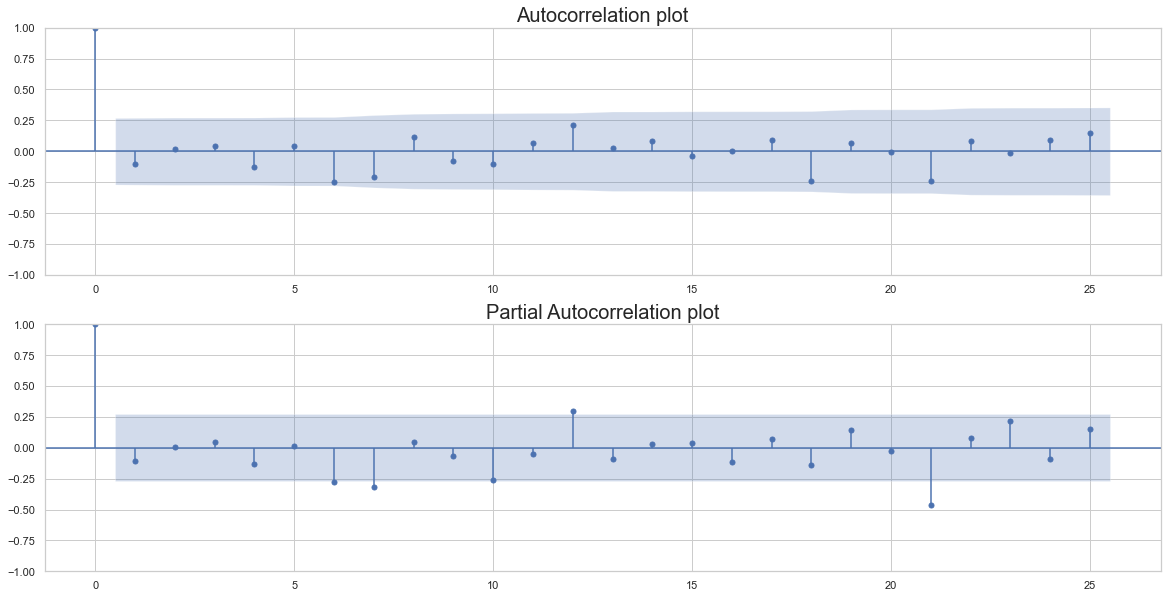

In [20]:
# Checking for correlation in the residuals to see if the model can be further improved

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(residuals,lags=25,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(residuals,lags=25,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

*Box-Cox Transformed Dataset*

The Box-Cox transform is a method that is able to evaluate a suite of power transforms, including, but not limited to, log, square root, and reciprocal transforms of the data.

In [21]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import boxcox
from scipy.special import inv_boxcox 
# scipy_version -> 1.6.2

series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
transformed, lam = boxcox(X)
print(f"Lambda: {lam}")

Lambda: 0.26006033924618177


Text(0.5, 1.0, 'QQ plot.')

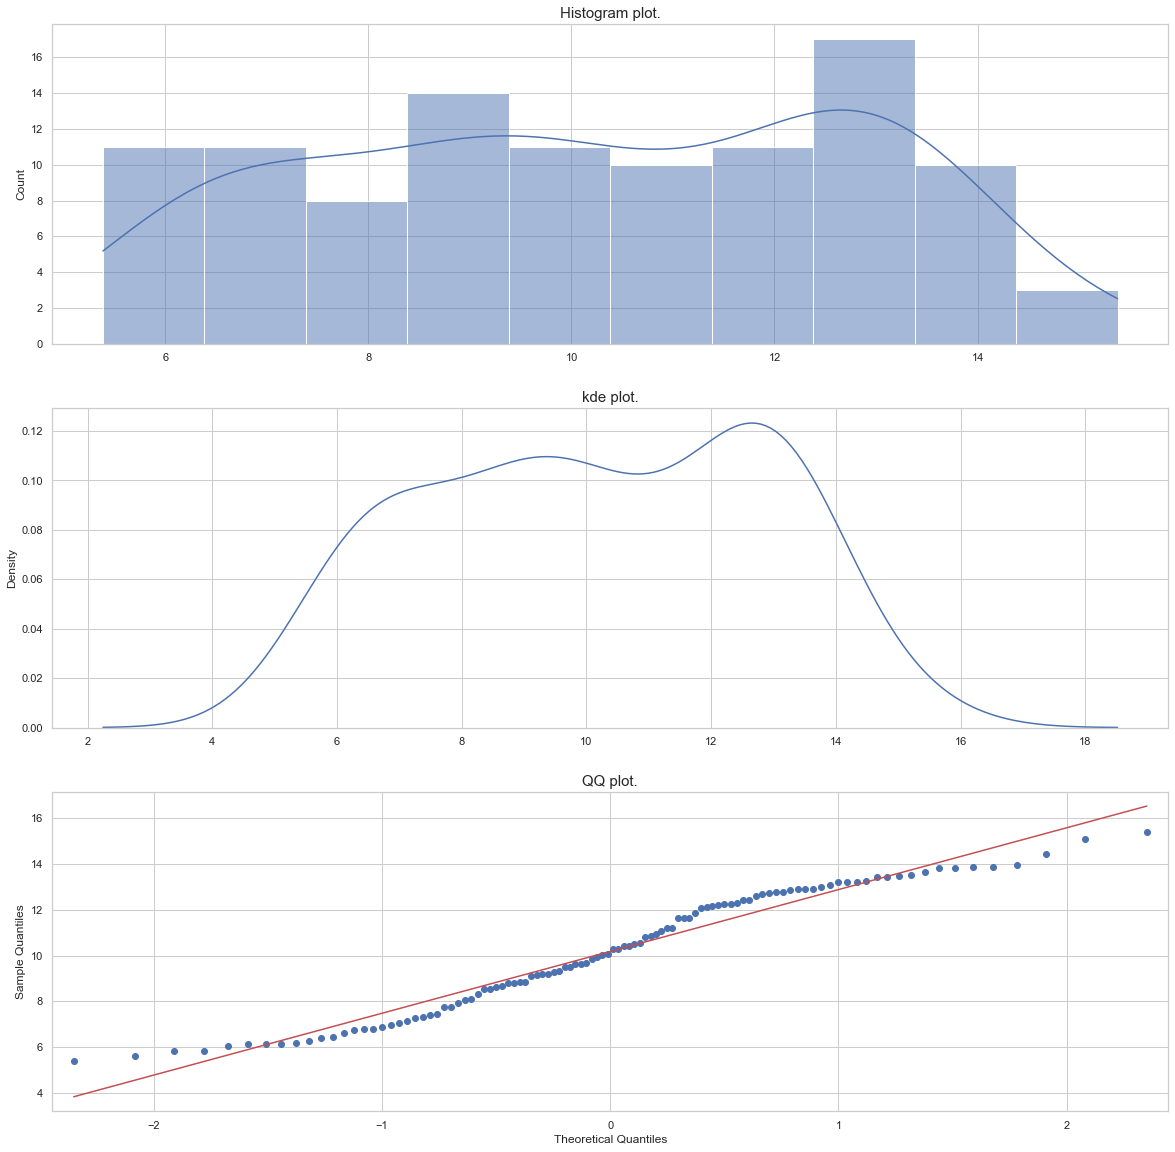

In [22]:
fig, ax = plt.subplots(3,1,figsize=(20,20))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=transformed,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=transformed, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

qqplot(transformed,line='r',ax=ax[2])
ax[2].set_title("QQ plot.", fontdict={'fontsize':15})

In [23]:
from math import log,exp
# invert box-cox transform
def boxcox_inverse(value,lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1)/ lam)

In [24]:
# evaluate ARIMA models with box-cox transformed time series
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X)* 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # transform
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed,lam = history,1

    # predict
    model = ARIMA(transformed, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]

    # invert transformed prediction
    yhat = inv_boxcox(yhat,lam)
    # yhat = boxcox_inverse(yhat,lam)
    yhat = np.round(yhat,4)
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {np.round(rmse,4)}")
warnings.filterwarnings("ignore")

Predicted: 99.6505, Expected: 125.0
Predicted: 115.2083, Expected: 155.0
Predicted: 136.1432, Expected: 190.0
Predicted: 165.5324, Expected: 236.0
Predicted: 206.5712, Expected: 189.0
Predicted: 180.9338, Expected: 174.0
Predicted: 178.2017, Expected: 178.0
Predicted: 179.3159, Expected: 136.0
Predicted: 145.4659, Expected: 161.0
Predicted: 165.5652, Expected: 171.0
Predicted: 166.4837, Expected: 149.0
Predicted: 152.0655, Expected: 184.0
Predicted: 179.5608, Expected: 155.0
Predicted: 155.2107, Expected: 276.0
Predicted: 238.9421, Expected: 224.0
Predicted: 210.7481, Expected: 213.0
Predicted: 214.0747, Expected: 279.0
Predicted: 257.4462, Expected: 268.0
Predicted: 255.4132, Expected: 287.0
Predicted: 275.9414, Expected: 238.0
Predicted: 245.0917, Expected: 213.0
Predicted: 226.6989, Expected: 257.0
Predicted: 252.3434, Expected: 293.0
Predicted: 275.3014, Expected: 212.0
Predicted: 224.6574, Expected: 246.0
Predicted: 248.227, Expected: 353.0
Predicted: 313.5776, Expected: 339.0
Pre

**Model Validation**

This section includes the following steps:
- Finalize Model: Train and save the final model.
- Make Prediction: Load the finalized model and make a prediction.
- Validate Model: Load and validate the final model.

*Finalize Model*

Finalizing the model involves fitting an ARIMA model on the entire dataset, in this case, on a transformed version of the entire dataset. Once fit, the model can be saved to file for later use. Because a Box-Cox transform is also performed on the data, we need to know the chosen lambda so that any predictions from the model can be converted back to the original, untransformed scale.

In [25]:
# load data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values.astype('float32')
# transformed data 
transformed, lam = boxcox(X)
# fit model
model = ARIMA(transformed, order=(0,1,2))
model_fit = model.fit()
# save model 
model_fit.save('model.pkl')
np.save('model_lambda.npy',[lam])

*Make Prediction*

A natural case may be to load the model and make a single forecast. This is relatively straight- forward and involves restoring the saved model and the lambda and calling the forecast() function.

In [26]:
from statsmodels.tsa.arima.model import ARIMAResults

model_fit = ARIMAResults.load("model.pkl")
lam = np.load("model_lambda.npy")
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat,lam)
print(f"Predicted: {yhat}")

Predicted: 452.36540216897635


*Validate Model*

We can load the model and use it in a pretend operational manner. In the test harness section, we saved the final 12 months of the original dataset in a separate file to validate the final model. We can load this validation.csv file now and use it see how well our model really is on unseen data. There are two ways we might proceed:
- Load the model and use it to forecast the next 12 months. The forecast beyond the first one or two months will quickly start to degrade in skill.
- Load the model and use it in a rolling-forecast manner, updating the transform and model for each time step. This is the preferred method as it is how one would use this model in practice, as it would achieve the best performance.

In [55]:
# load and prepare datasets
dataset = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
validation = pd.read_csv('validation.csv', header=None, index_col=0, parse_dates=True,
squeeze=True)
y = validation.values.astype('float32')

# load model 
model_fit = ARIMAResults.load("model.pkl")
lam = np.load("model_lambda.npy")
# make first prediction
predictions = []
yhat = model_fit.forecast()[0]
yhat = inv_boxcox(yhat,lam)
predictions.append(yhat)
history.append(y[0])
print(f"Predicted: {yhat[0]}, Expected: {y[0]}")
# rolling forecasts
for i in range(1, len(y)):
    # transform 
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed, lam = history,1
    # predict 
    model = ARIMA(transformed, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed predictions
    yhat = inv_boxcox(yhat,lam)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report perfomace
rmse = mean_squared_error(y, predictions,squared=False)
print(f"RMSE: {rmse}")

Predicted: 452.36540216897635, Expected: 452.0
Predicted: 429.9002266753184, Expected: 391.0
Predicted: 401.39320528266114, Expected: 500.0
Predicted: 476.4602240689317, Expected: 451.0
Predicted: 442.4528905147006, Expected: 375.0
Predicted: 397.5251725181817, Expected: 372.0
Predicted: 390.64706715381965, Expected: 302.0
Predicted: 329.39333797961217, Expected: 316.0
Predicted: 334.1709030036469, Expected: 398.0
Predicted: 382.8189066468512, Expected: 394.0
Predicted: 378.5084356344139, Expected: 431.0
Predicted: 413.52543757820973, Expected: 431.0
RMSE: 51.94860452858359


In [56]:
# fixing the issue wit the inv_boxcox which returns a list 
pred_pos_0 = predictions.pop(0)
pred_pos_0[0]
predictions.insert(0,pred_pos_0[0])

Text(0.5, 1.0, 'Line plot.')

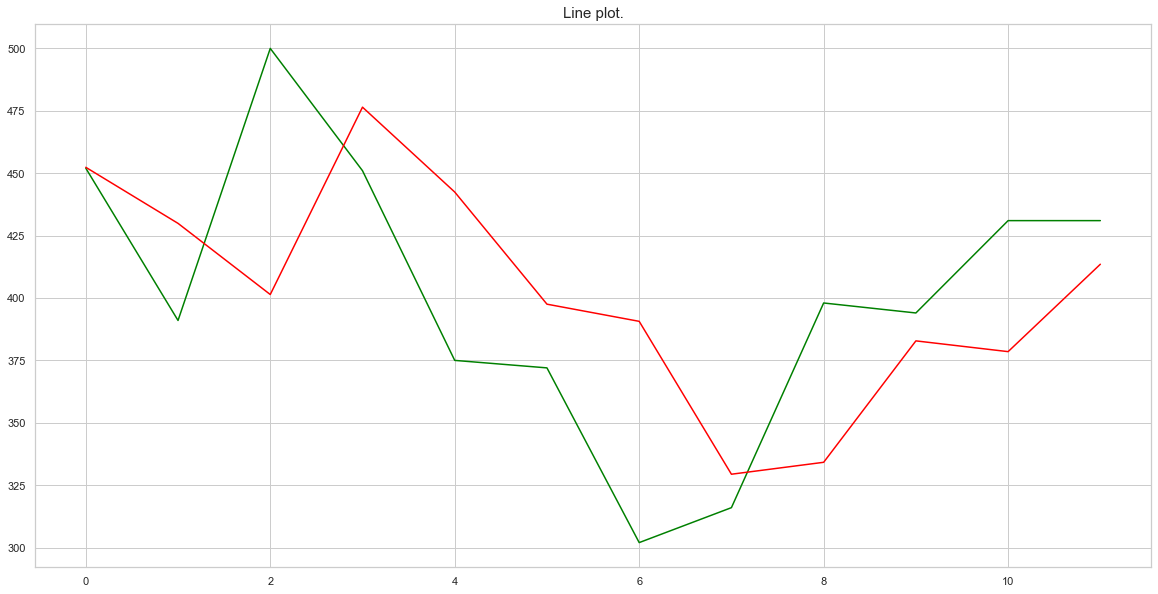

In [57]:
fig, ax = plt.subplots(1,figsize=(20,10))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.lineplot(data=y, ax=ax, color='green')
sns.lineplot(data=predictions,ax=ax, color='red')
ax.set_title("Line plot.", fontdict={'fontsize':15})
